## импорт библиотек

In [67]:
import os
import pandas as pd
import numpy as np
from IPython.display import display

#import seaborn as sns
#import matplotlib.pyplot as plt

import missingno as msno

#import scipy.stats
#from scipy.stats import spearmanr, kendalltau, chi2_contingency, pointbiserialr

import warnings
warnings.filterwarnings("ignore")

## объявление переменных

In [68]:
# даем колонкам имена
COLUMNS = ["x1", "Contract_number", "x2", "x3", "x4", "x5",
                      "x6", "x7", "x8", "x9", "x10", "x11", "x12",
                      "date1", "date2", "date3", "date4", "date5", "date6", "x13", "x14",
                      "x15", "x16", "x17", "x18", "y_description", "y"]
# путь на диске куда пишем результат
PATH = r"C:\Users\AnnaZheleznova\Documents\Cource_BigData\Diplom_github\Data" 
SEP = "___"
# путь на диске где размещены данные
CSV_DATA = r"C:\\Users\\AnnaZheleznova\\Documents\\Cource_BigData\\Diplom_github\\fz.zip" 

## загрузка данных

In [69]:
# chinksize: получен объемный датасет, делим датасет на части
# on_bad_lines="skip": для пропуска 'плохих строк', т.е строк где много полей
# dtype : как интерпретировать байты в блоке памяти 
chunksize = 10 ** 6
i = 0
with pd.read_csv(CSV_DATA, chunksize=chunksize, on_bad_lines="skip",dtype='unicode') as reader:
    for df in reader:
        if i < 3:
            i += 1
            continue

        df.columns = COLUMNS

        df["y"] = df["y"].astype(str)
        df = df[df["y"] != "<НЕ ОПРЕДЕЛЕНО>"]
        df = df[df["y"] != "<НЕ РАСПРЕДЕЛЕНО>"]
        df = df[df["y"].str.len() == 4]

        break

In [72]:
# посмотрим датасет, все колонки
display(df.head(2))

,x1,Contract_number,x2,x3,x4,x5,x6,x7,x8,x9,...,date5,date6,x13,x14,x15,x16,x17,x18,y_description,y
3000000,3616077,2643900685016000093,\N,6449082440,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \КУЛО...,64,6439006850,"ГУЗ СО \ГОРОДСКАЯ ПОЛИКЛИНИКА № 2 Г. БАЛАКОВО\""""",Саратовская область,<НЕ ОПРЕДЕЛЕНО>,...,\N,\N,<НЕ ОПРЕДЕЛЕНО>,662545.00,476470.86,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Здания и работы по возведению зданий,41.2
3000001,3616078,2643900685016000094,\N,6439077427,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \КЕЛЬ...,64,6439006850,"ГУЗ СО \ГОРОДСКАЯ ПОЛИКЛИНИКА № 2 Г. БАЛАКОВО\""""",Саратовская область,<НЕ ОПРЕДЕЛЕНО>,...,2016-12-30,\N,<НЕ ОПРЕДЕЛЕНО>,53300.00,53250.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Работы строительные специализированные,43.3


In [73]:
# интересует ОКПД 2, это колонка "у", посмотрим на уникальные значения по ней
df["y"].unique()

array(['41.2', '43.3', '19.2', '21.1', '21.2', '22.1', '20.5', '86.9',
       '32.5', '17.1', '81.2', '71.2', '14.1', '80.1', '61.1', '60.1',
       '25.9', '33.1', '10.7', '10.3', '10.8', '27.5', '80.2', '96.0',
       '17.2', '10.5', '10.1', '31.0', '01.1', '01.2', '10.6', '28.2',
       '20.2', '36.0', '20.1', '25.7', '23.9', '27.4', '10.4', '10.2',
       '13.2', '58.1', '38.2', '01.4', '58.2', '24.1', '26.6', '26.5',
       '22.2', '13.9', '20.4', '38.1', '25.1', '28.1', '24.4', '23.4',
       '65.1', '35.2', '20.3', '32.9', '43.2', '26.3', '18.1', '56.2',
       '63.1', '26.2', '08.9', '95.1', '29.3', '46.1', '35.1', '35.3',
       '43.9', '26.4', '27.3', '61.9', '37.0', '71.1', '15.2', '85.4',
       '82.3', '46.5', '24.5', '25.2', '14.3', '28.9', '27.1', '27.9',
       '23.5', '23.6', '03.1', '28.3', '14.2', '15.1', '10.9', '11.0',
       '62.0', '63.9', '53.1', '84.2', '86.1', '68.2', '16.2', '61.2',
       '74.9', '73.2', '49.3', '53.2', '81.1', '46.3', '32.3', '69.2',
      

In [74]:
# обрабатываем и сохраняем данные в PATH, немного ждем результат
# вот тут хорошо бы писать в базу данных
chunksize = 10 ** 5
chunk_id = 0
with pd.read_csv(CSV_DATA, chunksize=chunksize, on_bad_lines="skip", dtype='unicode') as reader:
    for df in reader:
        print(chunk_id, end=", ")
        if chunk_id >= 0:
            df.columns = COLUMNS

            df["y"] = df["y"].astype(str)
            df = df[df["y"] != "<НЕ ОПРЕДЕЛЕНО>"]
            df = df[df["y"] != "<НЕ РАСПРЕДЕЛЕНО>"]
            df = df[df["y"].str.len() == 4]


            df = df[["Contract_number", "x4", "x7", "x8", "x11", "x12", "x14", "x15", "y_description", "y"]]

            for y in df["y"].unique():
                if len(y) < 20:
                    df_crop = df[df["y"] == y]
                    df_crop.to_csv(os.path.join(PATH, f"{y}{SEP}{chunk_id}.csv"))
                else:
                    print()
                    print(y)

        chunk_id += 1

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [75]:
chunk_id

293

In [76]:
# посмотрим размер df
df.shape

(64657, 10)

In [77]:
df.size

646570

In [78]:
# посмотрим для примера данные по одному из ОКПД 2
df[df["y"] == "71.1"]

,Contract_number,x4,x7,x8,x11,x12,x14,x15,y_description,y
29200033,3691100437822000041,"ООО \ТСС\""""",АДМИНИСТРАЦИЯ КОНАКОВСКОГО РАЙОНА ТВЕРСКОЙ ОБЛ...,Тверская область,Осуществление строительного контроля за выполн...,местный бюджет,929771.77,418397.27,71.1,71.1
29200059,3694600014122000030,"ООО \УМ - 2\""""",АДМИНИСТРАЦИЯ ЗАТО ОЗЕРНЫЙ,Тверская область,Оказание услуг по осуществлению строительного ...,"выполненного в форме холма со ступенями\""""",\N,86030.77,<НЕ ОПРЕДЕЛЕНО>,71.1
29200064,3691100437822000042,"ООО \ТСС\""""",АДМИНИСТРАЦИЯ КОНАКОВСКОГО РАЙОНА ТВЕРСКОЙ ОБЛ...,Тверская область,Осуществление строительного контроля за выполн...,местный бюджет,685739.37,98569.50,71.1,71.1
29200282,1183108003922000025,ЛЮБЧИК АНАТОЛИЙ ВАСИЛЬЕВИЧ,ФГКУ \СПЕЦИАЛЬНОЕ УПРАВЛЕНИЕ ФПС № 30 МЧС РОСС...,Удмуртская Республика,проведение кадастровых работ на объекте СПСЧ-12,федеральный бюджет,82333.33,72156.85,71.1,71.1
29200291,3183202183022000001,"ООО \АРХИТЕКТУРНОЕ БЮРО МАКСИМА ВОРОНИНА\""""","МБУ СШ \МЦ \""ДЕЛЬФИН\""""",Удмуртская Республика,разработка эскизного проекта,\N,1291666.67,684000.00,71.1,71.1
...,...,...,...,...,...,...,...,...,...,...
29265580,3503408266722000086,СОРОКИН ДМИТРИЙ ВИКТОРОВИЧ,АДМИНИСТРАЦИЯ ОРЕХОВО-ЗУЕВСКОГО ГОРОДСКОГО ОКРУГА,Московская область,Оказание услуг по гидрологическому обследовани...,местный бюджет,240000.00,238800.00,71.1,71.1
29265581,3503408266722000085,"ООО \ЧОП \""МЕГАПОЛИС-ОПТИМА\""""",АДМИНИСТРАЦИЯ ОРЕХОВО-ЗУЕВСКОГО ГОРОДСКОГО ОКРУГА,Московская область,Выполнение работ по разработке проектно-сметно...,местный бюджет,54341.67,54069.96,71.1,71.1
29265630,2780114580422000034,"ООО \ИТС\""""","СПБ ГКУ \ДОДД\""""",Город Санкт-Петербург город федерального значения,Разработка проектно-сметной документации по со...,бюджет субъекта Российской Федерации,35154931.84,35505890.24,71.1,71.1
29265631,2780114580422000035,"ООО \ИТС\""""","СПБ ГКУ \ДОДД\""""",Город Санкт-Петербург город федерального значения,Разработка проектно-сметной документации по со...,бюджет субъекта Российской Федерации,38450706.70,34838647.86,71.1,71.1


## анализ данных

### посмотрим на данные, есть ли пропуски

In [79]:
df_info = pd.DataFrame({
    "DataType": df.dtypes,
    "MissingValues": df.isnull().sum(),
    "UniqueValues": df.nunique()
}).sort_values(by="MissingValues", ascending=False)

df_info['MissingValuesRatio'] = round(df_info['MissingValues'] / len(df),2)

df_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
Contract_number,object,0,52138,0.0
x4,object,0,21662,0.0
x7,object,0,20078,0.0
x8,object,0,271,0.0
x11,object,0,35810,0.0
x12,object,0,825,0.0
x14,object,0,31577,0.0
x15,object,0,44175,0.0
y_description,object,0,237,0.0
y,object,0,224,0.0


### процент пропущенных значений

In [80]:
# посмотрим пропуски (процент полей с пропущенными значениями)
total_fields = df.size
missing_values_count = df.isnull().sum().sum()
# процент пропущенных значений
missing_values_percentage = (missing_values_count / total_fields) *  100
print(f"Процент пропущенных значений: {missing_values_percentage:.2f}%")


Процент пропущенных значений: 0.00%


### строим изображение, по которому можно визуально определить расположение пропусков

<Axes: >

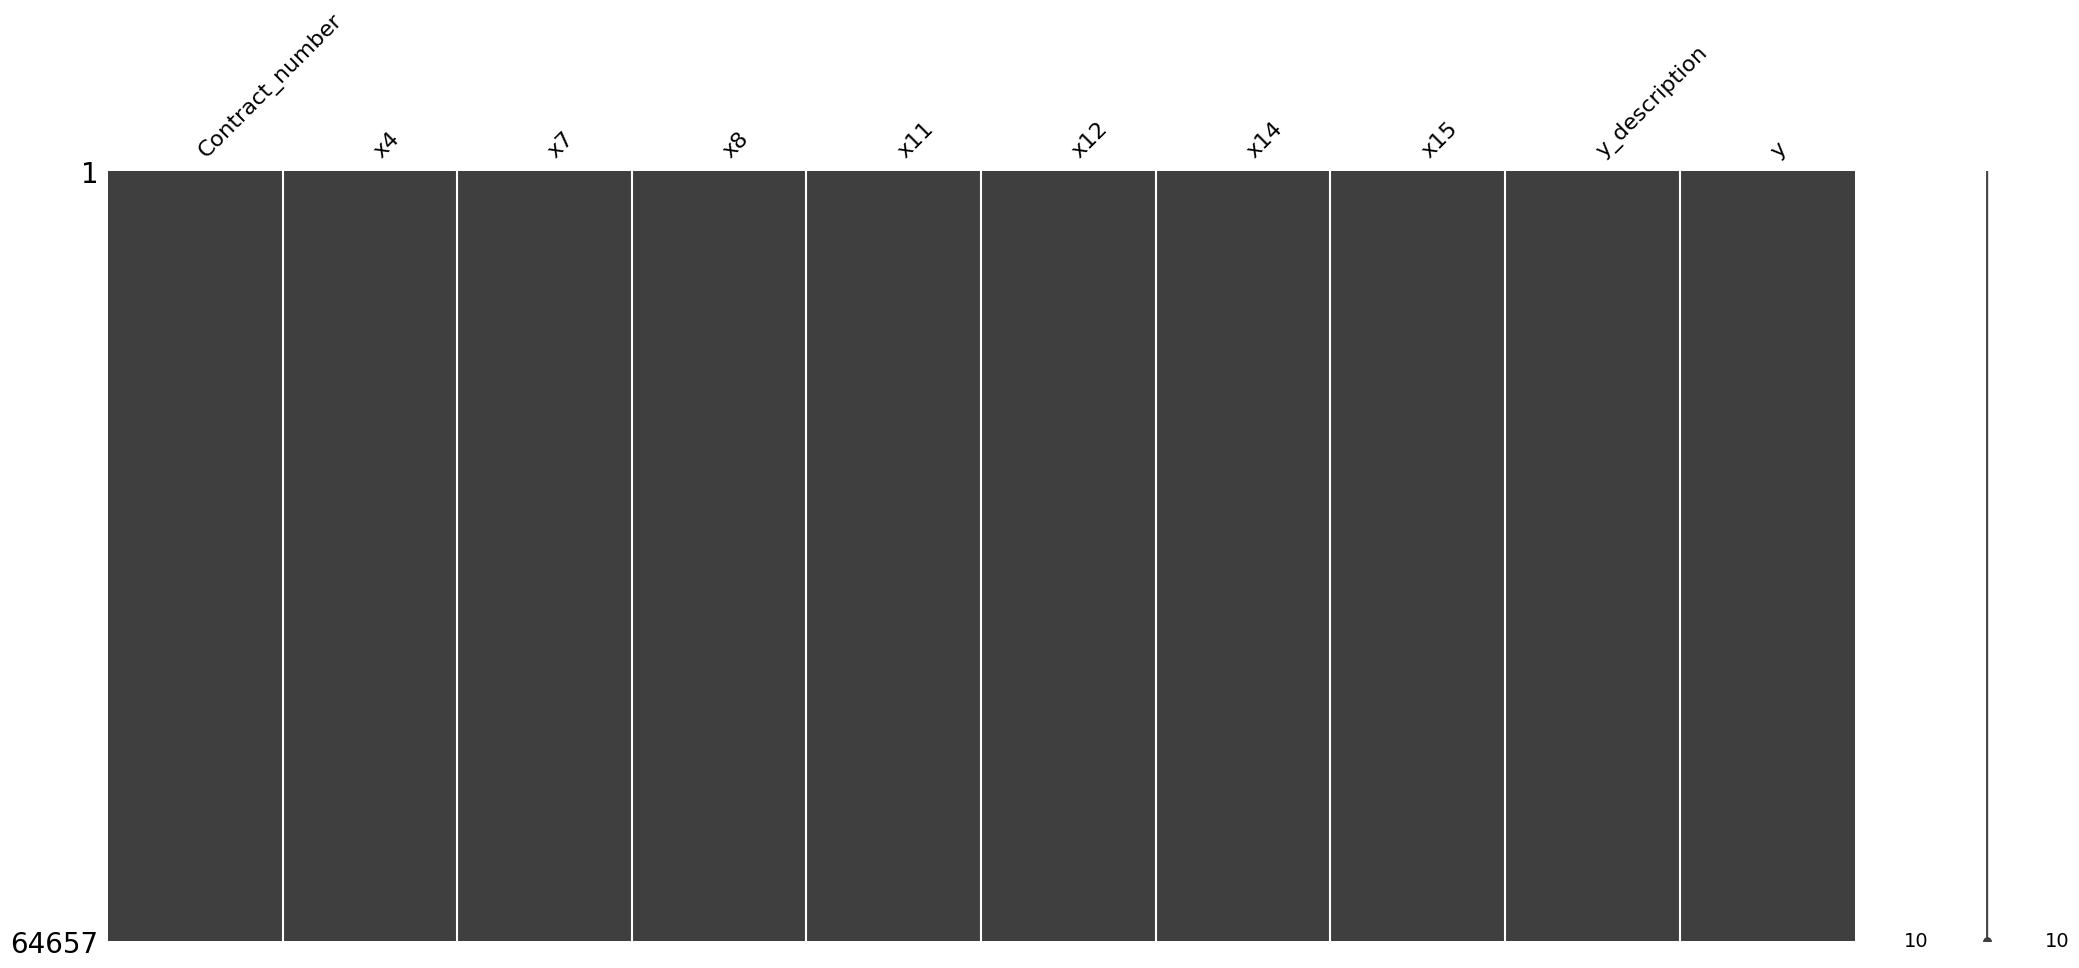

In [81]:
msno.matrix(df)

### проверим стоимость на наличие отрицательной

In [82]:
df['x14'].agg(['min', 'max'])

min                 0.32
max    Соглашение сторон
Name: x14, dtype: object

In [83]:
df['x15'].agg(['min', 'max'])

min    0.00
max      \N
Name: x15, dtype: object

### проверим контракты с одним номером, но с разными кодами ОКПД 2

In [91]:
duplicated_Contract_number = df[df['Contract_number'].duplicated(keep=False)].sort_values(by='Contract_number')

In [92]:
print(duplicated_Contract_number[['Contract_number','y']].head(20))

              Contract_number     y
29201656  1010501746721000016  56.2
29201655  1010501746721000016  56.2
29246247  1020200039522000135  10.6
29246246  1020200039522000135  10.8
29202518  1027301120222000064  33.1
29202517  1027301120222000064  33.1
29245862  1027410113822000179  26.3
29245861  1027410113822000179  27.3
29245860  1027410113822000179  22.2
29245856  1027410113822000180  80.2
29245857  1027410113822000180  80.2
29224819  1027416639021000017  35.3
29224818  1027416639021000017  35.3
29224816  1027416639021000017  35.3
29224817  1027416639021000017  35.3
29224797  1027416639022000138  28.2
29224796  1027416639022000138  25.7
29246085  1027416639022000141  25.7
29246086  1027416639022000141  28.2
29202744  1027500646222000119  26.4


In [99]:
# один контракт имеет несколько кодов обновременно, возможно это ошибки, уточнить у специалиста в предметной области, ниже итог
full_duplicates = duplicated_Contract_number.duplicated(keep=False).sum()
partial_duplicates = len(duplicated_Contract_number) - full_duplicates

In [100]:
print('Полных дупликатов:', full_duplicates)

Полных дупликатов: 8286


In [101]:
print('Частичных дупликатов: ', partial_duplicates)

Частичных дупликатов:  10936
